In [2]:
import pandas as pd 
import os
import gzip
import csv
import json
import gzip
import matplotlib.pyplot as plt

# Prepare data

In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
os.environ ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [5]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
! kaggle datasets download -d bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip

Archive:  ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip
replace 0401_UkraineCombinedTweetsDeduped.csv.gzip? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Read in a single file

In [5]:
f=gzip.open("UkraineCombinedTweetsDeduped_MAR29.csv.gzip",'rb')
df = pd.read_csv(f,dtype={'coordinates':'str'})
print(df.head())

   Unnamed: 0               userid       username  \
0           0  1048224526151180288       QubRadio   
1           1   753646546290257920    TwoRiversTX   
2           2           2722503240      vubblePOP   
3           3             51904755      StoreFiAi   
4           4  1402799742162247680  Lance91111461   

                                            acctdesc          location  \
0  Audacieuse, différente et tournée vers l’aveni...  Montréal, Québec   
1  also known as Texas Sunrise. Mom to three huma...               NaN   
2  Vubble is here to interpret, understand and da...        Everywhere   
3  #Cryptocurrency Live Prices #bitcoin #doge #et...               NaN   
4                  Always learning to educate others               NaN   

   following  followers  totaltweets               usercreatedts  \
0       1235       9389        25026  2018-10-05 14:52:56.000000   
1       1175        320       173932  2016-07-14 17:45:13.000000   
2       2176       3175        6

In [8]:
f=gzip.open("UkraineCombinedTweetsDeduped_MAR26.csv.gzip",'rb')
df2 = pd.read_csv(f,dtype={'coordinates':'str'})
print(df2.head())

   Unnamed: 0               userid         username  \
0           0  1142687555625738240        Steed0905   
1           1             21104432     VozdeAmerica   
2           2  1240416106730475520  quepasa_oficial   
3           3  1498353133042507787      ArmedMaidan   
4           4            567289542    Saudi_Gazette   

                                            acctdesc  \
0  いったんバイクアカウント停止します。\n今後はウクライナの情報を流していきます。\n嫌な方は...   
1  Tu fuente de noticias de #EstadosUnidos, #Amér...   
2  Portal de entretenimiento en el cual sabrás ¿Q...   
3  News about Russia's war on Ukraine from award-...   
4  Saudi Gazette is a leading English language da...   

                    location  following  followers  totaltweets  \
0                        NaN        396        324         4242   
1  Washington, D.C. - EE.UU.       1105     271308       267614   
2                        NaN          0        298        12935   
3             Quebec, Canada        292        396         1031 

# Filter english tweets

In [9]:
df_en = df[df['language']=='en']
df2_en = df2[df2['language']=='en']

# Merge two datasets

In [10]:
dlist = []
dlist.append(df_en)
dlist.append(df2_en)

In [11]:
concatlist = pd.concat(dlist)

In [13]:
len(concatlist)

542740

In [18]:
zelensk_df = pd.DataFrame(filter(lambda x: 'Zelensk' in x, concatlist["hashtags"]))
putin_df = pd.DataFrame(filter(lambda x: 'Putin' in x, concatlist["hashtags"]))

In [20]:
print(putin_df)

                                                       0
0      [{'text': 'BodyLanguage', 'indices': [94, 107]...
1      [{'text': 'Putin', 'indices': [34, 40]}, {'tex...
2      [{'text': 'Biden', 'indices': [30, 36]}, {'tex...
3      [{'text': 'Putin', 'indices': [159, 165]}, {'t...
4                [{'text': 'Putin', 'indices': [4, 10]}]
...                                                  ...
38387  [{'text': 'Animals', 'indices': [17, 25]}, {'t...
38388  [{'text': 'Army', 'indices': [52, 57]}, {'text...
38389  [{'text': 'Russia', 'indices': [66, 73]}, {'te...
38390  [{'text': 'Biden', 'indices': [21, 27]}, {'tex...
38391  [{'text': 'Biden', 'indices': [21, 27]}, {'tex...

[38392 rows x 1 columns]


In [29]:
from unidecode import unidecode
def evaluate_hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

In [33]:
masterlist_putin = []
hashtagsListCollection = putin_df[0].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist_putin.append(hashtag)

In [36]:
print(masterlist_putin)

['bodylanguageexpert', 'putin', 'bodylanguage', 'putin', 'sergeylavrov', 'biden', 'russia', 'ukraine', 'censorship', 'zelensky', 'biolabsinukraine', 'neonazis', 'putin', 'petrodollar', 'propaganda', 'istandwithukraine', 'fossilfuelsfundwar', 'putin', 'crimea', 'putin', 'ukrainian', 'russia', 'ukraine', 'stoprussianaggression', 'europa', 'europe', 'nuclearwar', 'nuclearweapons', 'putin', 'warcrimes', 'us', 'nato', 'nwo', 'wwiii', 'eu', 'putin', 'zog', 'putin', 'kyiv', 'biden', 'russia', 'joebiden', 'blinken', 'vladimirputin', 'putin', 'warsaw', 'china', 'putin', 'chinese', 'putin', 'russianarmy', 'death', 'stopputinnow', 'mariupol', 'putin', 'biden', 'stopputin', 'stopputinnow', 'stoprussia', 'stopthewar', 'russia', 'nurembergtribunal', 'putin', 'standwithukraine', 'aggression', 'putinwarcriminal', 'romanabramovich', 'standwithukraine', 'esgdivestrussia', 'stopputinnow', 'ukrainewillprevail', 'boycottrussia', 'putin', 'kyiv', 'putin', 'gazprom', 'putin', 'ukrainecrisis', 'russia', 'ukra

# Merge all datasets

In [61]:
full_df = []
data_list = []
for root, dirs, files in os.walk("/content/gdrive/MyDrive/kaggle_dataset/"):
    for file in files:
        #if file.contains("06"):
        if "MAR" in file:
            print(f"Current file:{file}")
            f=gzip.open(file,'rb')
            df = pd.read_csv(f,dtype={'coordinates':'str'})
            #df = pd.read_csv("D:/archive/data/"+file, dtype={'coordinates':'str'})
            df_en = df[df['language'] == 'en']
            data_list.append(df_en)
full_df = pd.concat(data_list)

Current file:UkraineCombinedTweetsDeduped_MAR01.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR02.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR03.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR04.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR05.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR06.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR07.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR08.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR09.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR10.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR11.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR12.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR13.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR14.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR15.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR16.csv.gzip
Current file:UkraineCombinedTweetsDeduped_MAR17.csv.gzip
Current file:UkraineCombinedTwe

Split dataframes

In [62]:
zelensk_df = pd.DataFrame(filter(lambda x: 'Zelensk' in x, full_df["hashtags"]))
putin_df = pd.DataFrame(filter(lambda x: 'Putin' in x, full_df["hashtags"]))

In [63]:
#putin_df = df_en[df_en["hashtags"].str.contains("Putin")]
#zelensk_df = df_en[df_en["hashtags"].str.contains("Zelensk")]

# Extract hashtag information

In [64]:
print(putin_df)

                                                         0
0        [{'text': 'VladimirPutin', 'indices': [40, 54]...
1        [{'text': 'Putin', 'indices': [19, 25]}, {'tex...
2        [{'text': 'UKRAINE', 'indices': [46, 54]}, {'t...
3        [{'text': 'UKRAINE', 'indices': [46, 54]}, {'t...
4        [{'text': 'Russian', 'indices': [41, 49]}, {'t...
...                                                    ...
1115382           [{'text': 'Putin', 'indices': [17, 23]}]
1115383  [{'text': 'Ukraine', 'indices': [99, 107]}, {'...
1115384  [{'text': 'Putin', 'indices': [35, 41]}, {'tex...
1115385  [{'text': 'Putin', 'indices': [40, 46]}, {'tex...
1115386         [{'text': 'Putin', 'indices': [130, 136]}]

[1115387 rows x 1 columns]


In [65]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from unidecode import unidecode
def evaluate_hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags



In [67]:
masterlist_putin = []
hashtagsListCollection = putin_df[0].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist_putin.append(hashtag)

In [68]:
#print(masterlist_putin)

In [69]:
len(masterlist_putin)

3998907

In [70]:
topXItem = 10
from collections import Counter

x_putin = Counter(masterlist_putin)

topXItemList_putin = x_putin.most_common(topXItem)

In [71]:
df_hash_putin = pd.DataFrame(topXItemList_putin)
df_hash_putin.columns =['Hashtag','Tweets']
df_hash_putin

,Hashtag,Tweets
0,putin,767174
1,ukraine,310424
2,stopputin,236806
3,russia,168540
4,safeairliftukraine,159604
5,standwithukraine,114369
6,stopputinnow,86894
7,stoprussia,76157
8,kyiv,43231
9,russian,43095


In [72]:
dfpivot_putin = df_hash_putin.T
new_header = dfpivot_putin.iloc[0] #grab the first row for the header
dfpivot_putin = dfpivot_putin[1:] #take the data less the header row
dfpivot_putin.columns = new_header #set the header row as the df header
dfpivot_putin

Hashtag,putin,ukraine,stopputin,russia,safeairliftukraine,standwithukraine,stopputinnow,stoprussia,kyiv,russian
Tweets,767174,310424,236806,168540,159604,114369,86894,76157,43231,43095


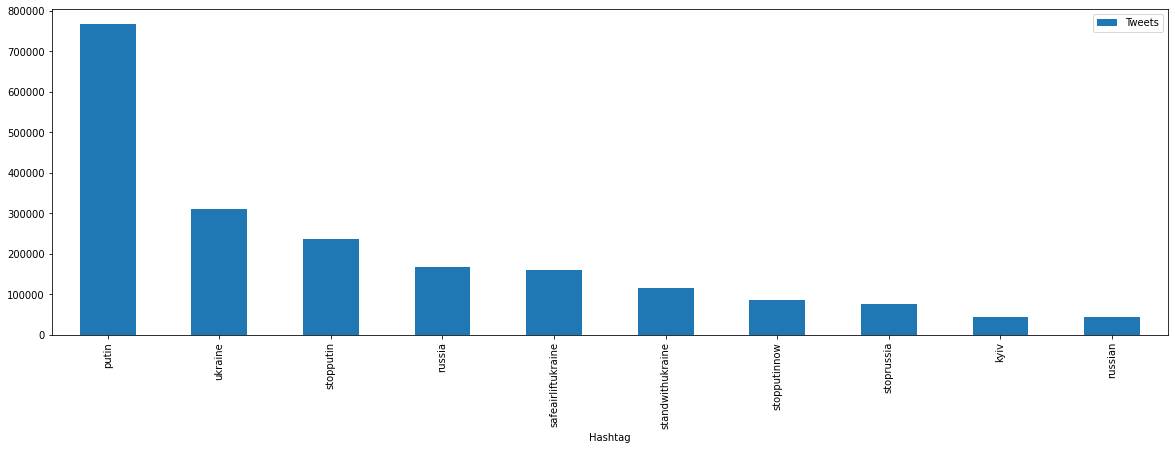

In [73]:
plt.rcParams["figure.figsize"] = [20, 6]
df_hash_putin.plot.bar(x='Hashtag', y='Tweets', rot=90)

In [74]:
masterlist_zelensky = []
hashtagsListCollection = zelensk_df[0].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist_zelensky.append(hashtag)

In [75]:
topXItem = 10
from collections import Counter

x_zelensky = Counter(masterlist_zelensky)

topXItemList_zelensky = x_zelensky.most_common(topXItem)

In [76]:
df_hash_zelensky = pd.DataFrame(topXItemList_zelensky)
df_hash_zelensky.columns =['Hashtag','Tweets']
df_hash_zelensky

,Hashtag,Tweets
0,zelensky,62488
1,ukraine,59946
2,zelenskyy,56081
3,putin,28328
4,russia,25269
5,kyiv,13127
6,nato,12921
7,standwithukraine,12285
8,ukrainerussianwar,9158
9,ukrainerussiawar,8606


In [77]:
dfpivot_zelensky = df_hash_zelensky.T
new_header = dfpivot_zelensky.iloc[0] #grab the first row for the header
dfpivot_zelensky = dfpivot_zelensky[1:] #take the data less the header row
dfpivot_zelensky.columns = new_header #set the header row as the df header
dfpivot_zelensky

Hashtag,zelensky,ukraine,zelenskyy,putin,russia,kyiv,nato,standwithukraine,ukrainerussianwar,ukrainerussiawar
Tweets,62488,59946,56081,28328,25269,13127,12921,12285,9158,8606


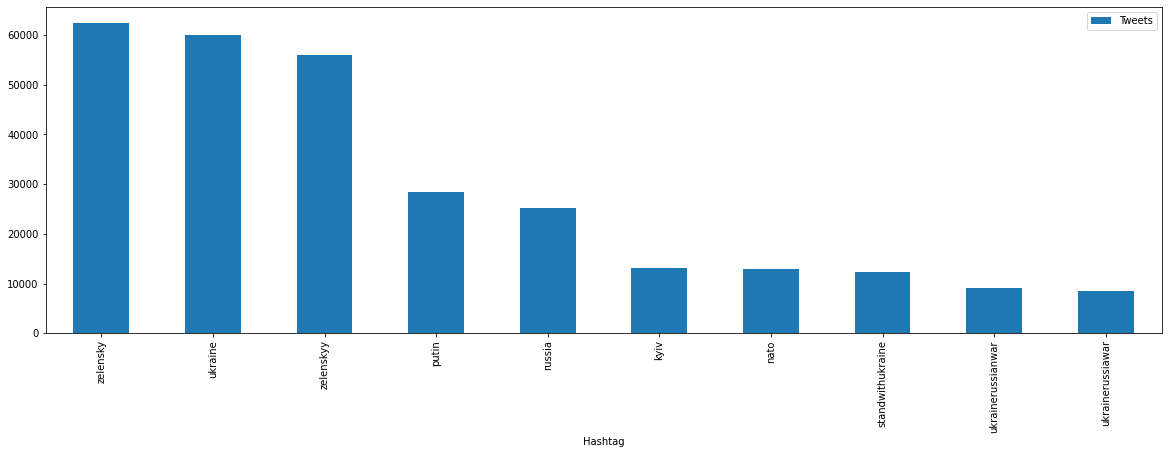

In [78]:
plt.rcParams["figure.figsize"] = [20, 6]
df_hash_zelensky.plot.bar(x='Hashtag', y='Tweets', rot=90)